# Práctica 1: Perceptrón multicapa.

Tu jefe pidió a RH que recolectara datos de desempeño de tus compañeros, los resultados se almacenaron en un csv. El punto critico de estos datos es la satisfacción del empleado, entonces ¿Podremos estimar la satisfacción de los empleados con los datos recabados?.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models


df = pd.read_csv('Extended_Employee_Performance_and_Productivity_Data.csv')
df.info()

2025-07-28 11:06:32.989629: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-28 11:06:33.172493: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-28 11:06:33.310452: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753689993.448394    6696 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753689993.486817    6696 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1753689993.777489    6696 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  object 
 5   Hire_Date                    100000 non-null  object 
 6   Years_At_Company             100000 non-null  int64  
 7   Education_Level              100000 non-null  object 
 8   Performance_Score            100000 non-null  int64  
 9   Monthly_Salary               100000 non-null  float64
 10  Work_Hours_Per_Week          100000 non-null  int64  
 11  Projects_Handled             100000 non-null  int64  
 12  Overtime_Hours               100000 non-null  int64  
 13  

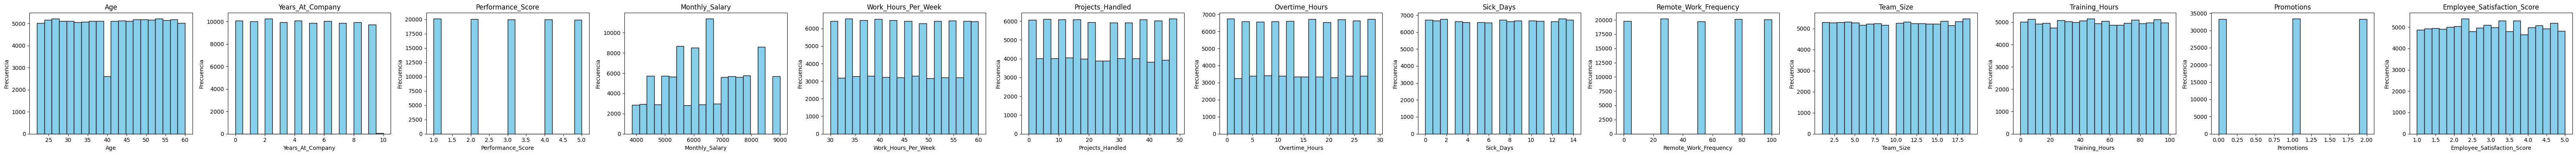

In [2]:
# Filtrar las columnas numéricas
numeric_columns = df.select_dtypes(include=['number']).drop('Employee_ID',axis=1)


# Si numeric_columns es un Index, conviértelo a lista
cols = list(numeric_columns)

fig, axes = plt.subplots(1, len(cols), figsize=(5 * len(cols), 4))

for i, col in enumerate(cols):
    axes[i].hist(df[col], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

**Problemas**, tenemos distribuciones con picos, esos nos indica categorías. Por otro lado, tenemos variables con "valles" en su distribución (distribuciones multimodales) por lo que resultaría óptimo aplicar técnicas de feature engeneering. Por último tenemos distribuciones uniformes, por lo que cada una requeriría un procesamiento indivudual, hagamos la vista gorda e intentemos ajustar un MLP con estos datos, solo estandaricemos nuestros datos.

---

## Implementación de Red:

To**memos los datos numéricos como nuestra variable X, y la variable objetivo como ***'Employee_Satisfaction_Score'***.
- **Actividad 1**: Para todos los strings ``'@modif@'`` que aparescan en el siguiente bloque de código cámbialos para que el código funcione.

In [5]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [6]:
if 'Employee_Satisfaction_Score' not in numeric_columns:
    numeric_columns.append('Employee_Satisfaction_Score')

In [8]:
print(numeric_columns)

['Employee_ID', 'Age', 'Years_At_Company', 'Performance_Score', 'Monthly_Salary', 'Work_Hours_Per_Week', 'Projects_Handled', 'Overtime_Hours', 'Sick_Days', 'Remote_Work_Frequency', 'Team_Size', 'Training_Hours', 'Promotions', 'Employee_Satisfaction_Score']


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Definir columnas numéricas si no lo has hecho aún
numeric_columns = [
    'Employee_ID', 'Age', 'Years_At_Company', 'Performance_Score',
    'Monthly_Salary', 'Work_Hours_Per_Week', 'Projects_Handled',
    'Overtime_Hours', 'Sick_Days', 'Remote_Work_Frequency',
    'Team_Size', 'Training_Hours', 'Promotions', 'Employee_Satisfaction_Score'
]

# Separar variables predictoras y objetivo
X = df[numeric_columns].drop('Employee_Satisfaction_Score', axis=1)
y = df['Employee_Satisfaction_Score'].apply(lambda x: round(x) - 1)  # 0 a 4

# Estandarizar
scaler = StandardScaler()
X_standar = scaler.fit_transform(X)

# Dividir
X_train, X_test, y_train, y_test = train_test_split(X_standar, y, test_size=0.33, random_state=42)

# One-hot encoding
y_onehot_train = tf.keras.utils.to_categorical(y_train, 5)
y_onehot_test = tf.keras.utils.to_categorical(y_test, 5)

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Definición del modelo
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Capa oculta 1
    Dropout(0.3),
    Dense(32, activation='relu'),                                   # Capa oculta 2
    Dropout(0.3),
    Dense(5, activation='softmax')                                  # Capa de salida (5 clases)
])

# Compilación del modelo
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenamiento
history = model.fit(
    X_train,
    y_onehot_train,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)


Epoch 1/20


/home/belleomort/.pyenv/versions/3.10.14/envs/mlp310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-28 11:29:11.883558: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


838/838 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2382 - loss: 1.6114 - val_accuracy: 0.2529 - val_loss: 1.5585
Epoch 2/20
838/838 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2548 - loss: 1.5606 - val_accuracy: 0.2464 - val_loss: 1.5575
Epoch 3/20
838/838 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2575 - loss: 1.5546 - val_accuracy: 0.2487 - val_loss: 1.5579
Epoch 4/20
838/838 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2575 - loss: 1.5539 - val_accuracy: 0.2531 - val_loss: 1.5572
Epoch 5/20
838/838 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2569 - loss: 1.5546 - val_accuracy: 0.2513 - val_loss: 1.5571
Epoch 6/20
838/838 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2585 - loss: 1.5526 - val_accuracy: 0.2513 - val_loss: 1.5568
Epoch 7/20
838/838 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2589 - loss: 1.5541 - val_accuracy: 0.2464 - val_loss: 1.5570
Epoch 8/20
838/838 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2584 - loss: 1.5547 - val_accuracy: 0.2499 - val_

In [11]:
# Evaluar en el set de prueba
test_loss, test_acc = model.evaluate(X_test, y_onehot_test)
print(f'Precisión en datos de prueba: {test_acc:.4f}')

1032/1032 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2480 - loss: 1.5579
Precisión en datos de prueba: 0.2528


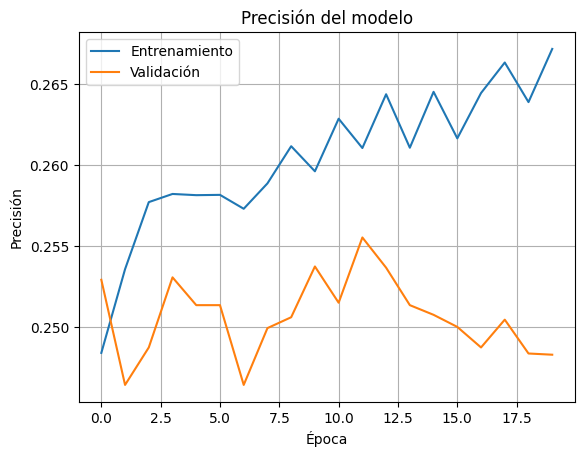

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Precisión del modelo')
plt.legend()
plt.grid()
plt.show()

- **Actividad 2:** Implementa 3 arquitecturas de MLP, cada una con su propio nombre, cambiando la estructura de dichas arquitecturas (capas, neuronas por capa, función de activación, etc). 

In [13]:
def mlp_basico(input_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(32, activation='relu', input_shape=(input_dim,)),
        tf.keras.layers.Dense(5, activation='softmax')
    ])
    return model

modelo1 = mlp_basico(X_train.shape[1])
modelo1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist1 = modelo1.fit(X_train, y_onehot_train, epochs=20, batch_size=64, validation_split=0.2)


Epoch 1/20
838/838 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2469 - loss: 1.6047 - val_accuracy: 0.2543 - val_loss: 1.5652
Epoch 2/20
838/838 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2540 - loss: 1.5618 - val_accuracy: 0.2545 - val_loss: 1.5622
Epoch 3/20
838/838 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2579 - loss: 1.5596 - val_accuracy: 0.2501 - val_loss: 1.5609
Epoch 4/20
838/838 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2664 - loss: 1.5528 - val_accuracy: 0.2514 - val_loss: 1.5613
Epoch 5/20
838/838 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2606 - loss: 1.5559 - val_accuracy: 0.2532 - val_loss: 1.5602
Epoch 6/20
838/838 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2654 - loss: 1.5540 - val_accuracy: 0.2550 - val_loss: 1.5605
Epoch 7/20
838/838 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2642 - loss: 1.5549 - val_accuracy: 0.2531 - val_loss: 1.5602
Epoch 8/20
838/838 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2654 - loss: 1.5525 - val_accuracy: 0.

In [14]:
def mlp_intermedio(input_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='tanh', input_shape=(input_dim,)),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(32, activation='tanh'),
        tf.keras.layers.Dense(5, activation='softmax')
    ])
    return model

modelo2 = mlp_intermedio(X_train.shape[1])
modelo2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist2 = modelo2.fit(X_train, y_onehot_train, epochs=20, batch_size=64, validation_split=0.2)


Epoch 1/20
838/838 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2404 - loss: 1.6110 - val_accuracy: 0.2510 - val_loss: 1.5634
Epoch 2/20
838/838 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2581 - loss: 1.5597 - val_accuracy: 0.2536 - val_loss: 1.5605
Epoch 3/20
838/838 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2542 - loss: 1.5600 - val_accuracy: 0.2495 - val_loss: 1.5600
Epoch 4/20
838/838 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2560 - loss: 1.5563 - val_accuracy: 0.2534 - val_loss: 1.5592
Epoch 5/20
838/838 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2534 - loss: 1.5602 - val_accuracy: 0.2523 - val_loss: 1.5596
Epoch 6/20
838/838 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2595 - loss: 1.5571 - val_accuracy: 0.2549 - val_loss: 1.5592
Epoch 7/20
838/838 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2611 - loss: 1.5575 - val_accuracy: 0.2437 - val_loss: 1.5608
Epoch 8/20
838/838 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2625 - loss: 1.5542 - val_accuracy: 0.

In [15]:
def mlp_profundo(input_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(input_dim,)),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(5, activation='softmax')
    ])
    return model

modelo3 = mlp_profundo(X_train.shape[1])
modelo3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist3 = modelo3.fit(X_train, y_onehot_train, epochs=20, batch_size=64, validation_split=0.2)


Epoch 1/20
838/838 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2477 - loss: 1.5711 - val_accuracy: 0.2484 - val_loss: 1.5586
Epoch 2/20
838/838 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2535 - loss: 1.5552 - val_accuracy: 0.2563 - val_loss: 1.5571
Epoch 3/20
838/838 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2573 - loss: 1.5535 - val_accuracy: 0.2515 - val_loss: 1.5579
Epoch 4/20
838/838 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2577 - loss: 1.5544 - val_accuracy: 0.2559 - val_loss: 1.5572
Epoch 5/20
838/838 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2574 - loss: 1.5540 - val_accuracy: 0.2495 - val_loss: 1.5575
Epoch 6/20
838/838 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2598 - loss: 1.5528 - val_accuracy: 0.2530 - val_loss: 1.5574
Epoch 7/20
838/838 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2584 - loss: 1.5548 - val_accuracy: 0.2516 - val_loss: 1.5581
Epoch 8/20
838/838 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2625 - loss: 1.5517 - val_accuracy: 0.

- **Actividad 3:** Compila y ajusta tus tres modelos con sus respectivos hiperparámetros.

In [16]:
# Compilación
modelo1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Ajuste
hist1 = modelo1.fit(
    X_train, y_onehot_train,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)


Epoch 1/20
838/838 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2688 - loss: 1.5539 - val_accuracy: 0.2531 - val_loss: 1.5617
Epoch 2/20
838/838 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2695 - loss: 1.5534 - val_accuracy: 0.2546 - val_loss: 1.5614
Epoch 3/20
838/838 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2744 - loss: 1.5509 - val_accuracy: 0.2522 - val_loss: 1.5616
Epoch 4/20
838/838 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2725 - loss: 1.5491 - val_accuracy: 0.2519 - val_loss: 1.5618
Epoch 5/20
838/838 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2763 - loss: 1.5503 - val_accuracy: 0.2535 - val_loss: 1.5612
Epoch 6/20
838/838 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2742 - loss: 1.5519 - val_accuracy: 0.2512 - val_loss: 1.5615
Epoch 7/20
838/838 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2715 - loss: 1.5483 - val_accuracy: 0.2537 - val_loss: 1.5616
Epoch 8/20
838/838 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2710 - loss: 1.5514 - val_accuracy: 0.

In [17]:
# Compilación
modelo2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Ajuste
hist2 = modelo2.fit(
    X_train, y_onehot_train,
    epochs=30,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)


Epoch 1/30
419/419 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2694 - loss: 1.5506 - val_accuracy: 0.2574 - val_loss: 1.5587
Epoch 2/30
419/419 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2725 - loss: 1.5526 - val_accuracy: 0.2532 - val_loss: 1.5592
Epoch 3/30
419/419 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2712 - loss: 1.5501 - val_accuracy: 0.2555 - val_loss: 1.5598
Epoch 4/30
419/419 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2689 - loss: 1.5531 - val_accuracy: 0.2540 - val_loss: 1.5594
Epoch 5/30
419/419 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2696 - loss: 1.5536 - val_accuracy: 0.2519 - val_loss: 1.5593
Epoch 6/30
419/419 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2691 - loss: 1.5540 - val_accuracy: 0.2543 - val_loss: 1.5595
Epoch 7/30
419/419 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2700 - loss: 1.5523 - val_accuracy: 0.2543 - val_loss: 1.5599
Epoch 8/30
419/419 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2678 - loss: 1.5527 - val_accuracy: 0.

In [18]:
# Compilación
modelo3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Ajuste
hist3 = modelo3.fit(
    X_train, y_onehot_train,
    epochs=40,
    batch_size=256,
    validation_split=0.2,
    verbose=1
)


Epoch 1/40
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2760 - loss: 1.5457 - val_accuracy: 0.2531 - val_loss: 1.5591
Epoch 2/40
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2705 - loss: 1.5483 - val_accuracy: 0.2512 - val_loss: 1.5591
Epoch 3/40
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2696 - loss: 1.5494 - val_accuracy: 0.2522 - val_loss: 1.5592
Epoch 4/40
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2703 - loss: 1.5481 - val_accuracy: 0.2513 - val_loss: 1.5593
Epoch 5/40
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2738 - loss: 1.5477 - val_accuracy: 0.2513 - val_loss: 1.5594
Epoch 6/40
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2741 - loss: 1.5481 - val_accuracy: 0.2520 - val_loss: 1.5595
Epoch 7/40
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2775 - loss: 1.5449 - val_accuracy: 0.2521 - val_loss: 1.5597
Epoch 8/40
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2697 - loss: 1.5470 - val_accuracy: 0.

In [19]:
import matplotlib.pyplot as plt

def plot_training_curves(history, model_name="Modelo"):
    plt.figure(figsize=(14, 5))

    # Pérdida
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Entrenamiento')
    plt.plot(history.history['val_loss'], label='Validación')
    plt.title(f'{model_name} - Pérdida')
    plt.xlabel('Épocas')
    plt.ylabel('Loss')
    plt.legend()

    # Precisión
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Validación')
    plt.title(f'{model_name} - Precisión')
    plt.xlabel('Épocas')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


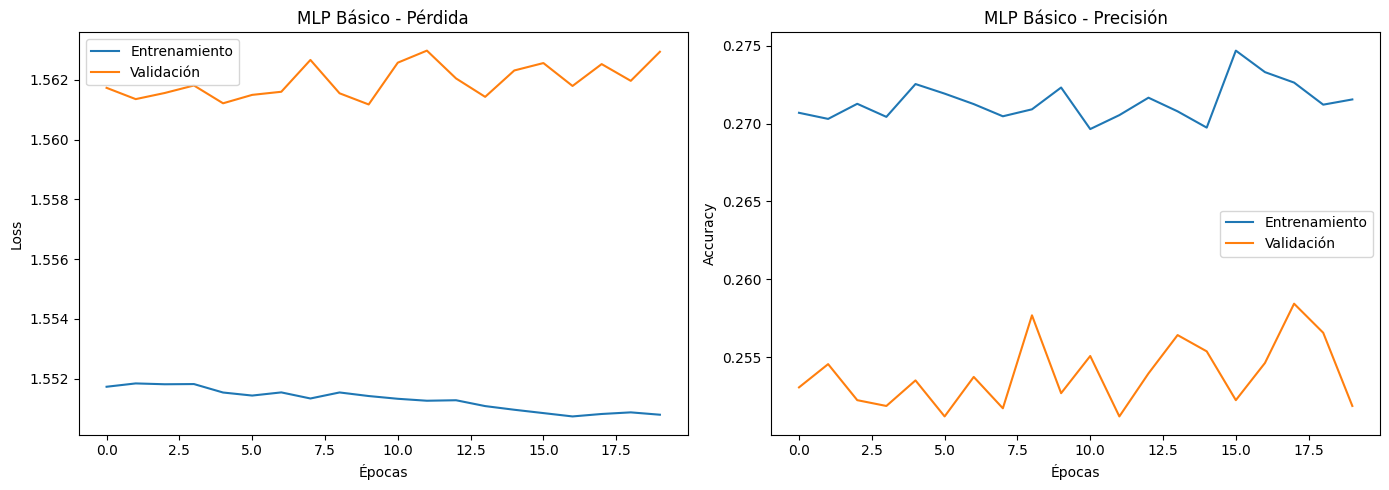

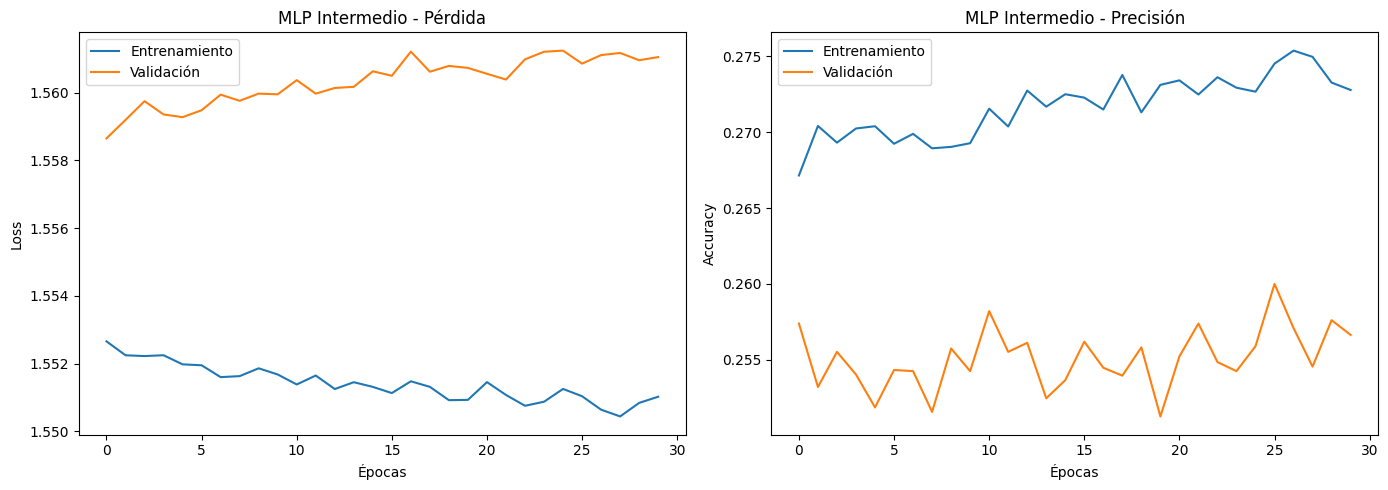

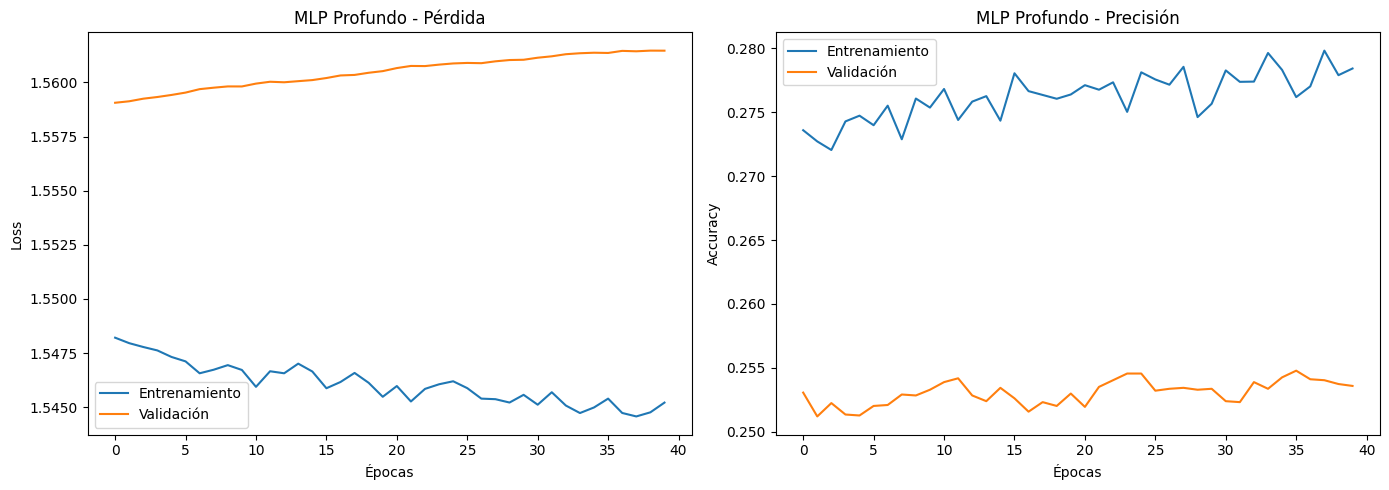

In [20]:
plot_training_curves(hist1, "MLP Básico")
plot_training_curves(hist2, "MLP Intermedio")
plot_training_curves(hist3, "MLP Profundo")


In [25]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_model_1():
    model = models.Sequential([
        layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(5, activation='softmax')
    ])
    return model

def build_model_2():
    model = models.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(32, activation='relu'),
        layers.Dense(5, activation='softmax')
    ])
    return model

def build_model_3():
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(5, activation='softmax')
    ])
    return model


In [26]:
model1 = build_model_1()
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist1 = model1.fit(X_train, y_onehot_train, epochs=20, batch_size=32, validation_split=0.2, verbose=0)

model2 = build_model_2()
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist2 = model2.fit(X_train, y_onehot_train, epochs=20, batch_size=32, validation_split=0.2, verbose=0)

model3 = build_model_3()
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist3 = model3.fit(X_train, y_onehot_train, epochs=20, batch_size=32, validation_split=0.2, verbose=0)


In [27]:
# Evaluar los tres modelos en el conjunto de prueba
loss1, acc1 = model1.evaluate(X_test, y_onehot_test, verbose=0)
loss2, acc2 = model2.evaluate(X_test, y_onehot_test, verbose=0)
loss3, acc3 = model3.evaluate(X_test, y_onehot_test, verbose=0)

print(f"MLP Básico - Loss: {loss1:.4f}, Accuracy: {acc1:.4f}")
print(f"MLP Intermedio - Loss: {loss2:.4f}, Accuracy: {acc2:.4f}")
print(f"MLP Profundo - Loss: {loss3:.4f}, Accuracy: {acc3:.4f}")


MLP Básico - Loss: 1.5612, Accuracy: 0.2512
MLP Intermedio - Loss: 1.5760, Accuracy: 0.2492
MLP Profundo - Loss: 1.6084, Accuracy: 0.2509


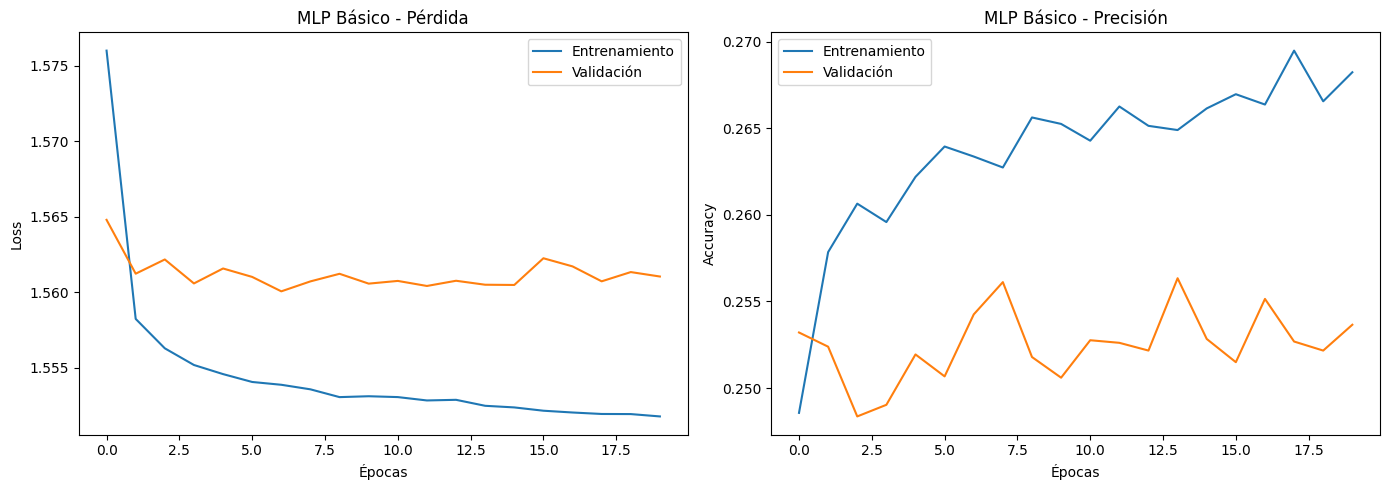

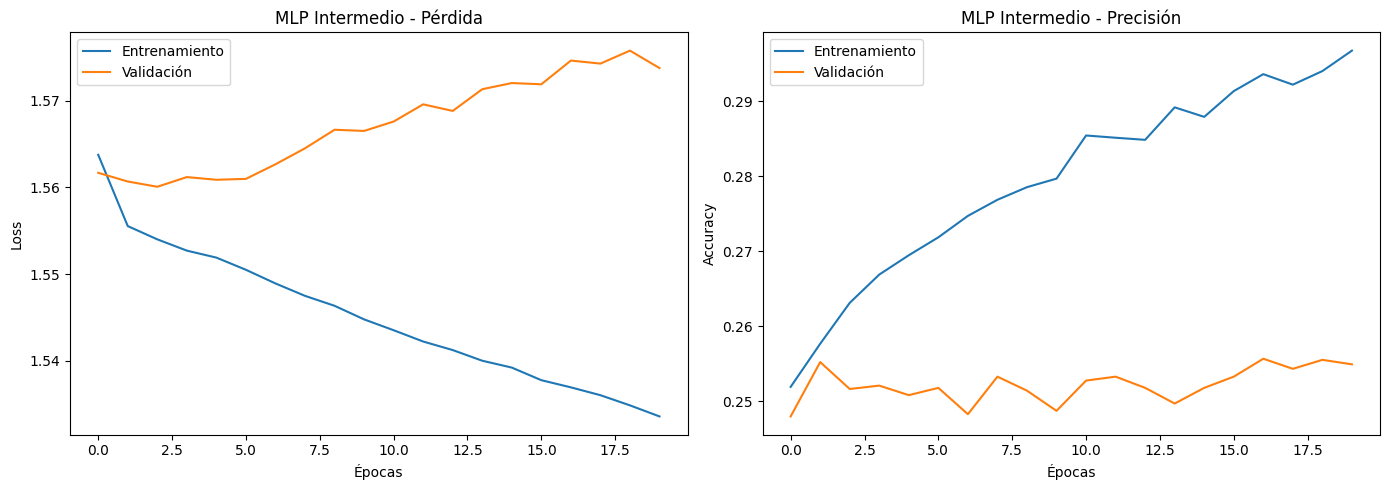

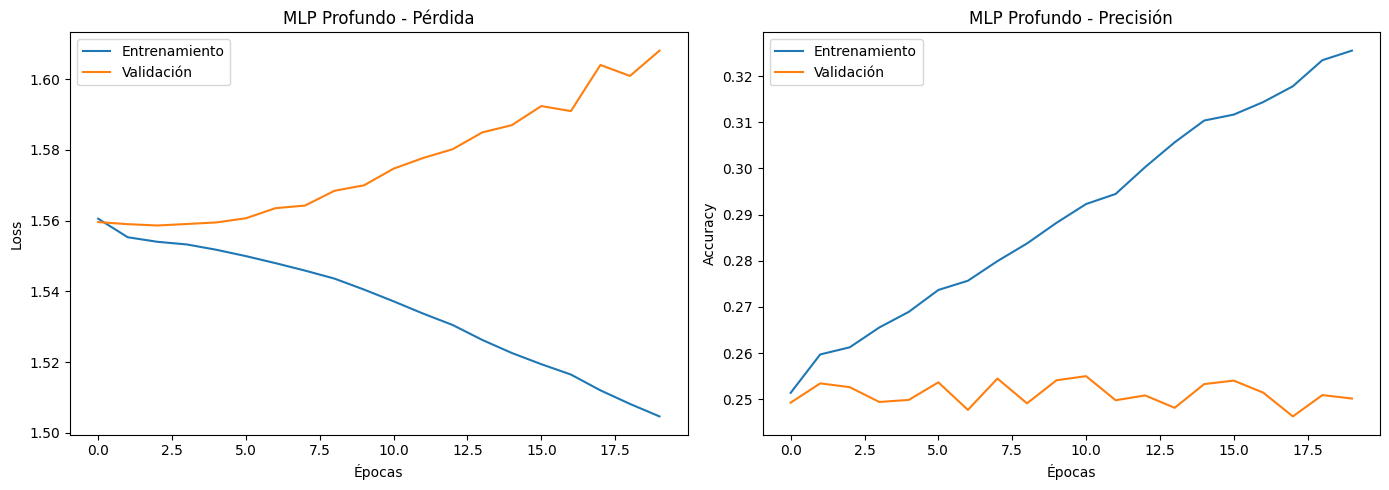

In [28]:
plot_training_curves(hist1, "MLP Básico")
plot_training_curves(hist2, "MLP Intermedio")
plot_training_curves(hist3, "MLP Profundo")


- **Actividad 4:** Sube tus cambios al repositorio, envía el link de tu repositorio a la actividad 2 de tu checkpoint 2 y contesta las preguntas de dicha actividad.